In [189]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import Bounds
import matplotlib.pyplot as plt

## Objective function

In [155]:
def objective(x):
    vec = np.array([30,20,40,80,0, 0.01,0.01, 0]) # cost function
    return vec @ x 

## Upper bound and Lower bound

In [156]:
bounds = Bounds(np.zeros(8),[1000,1200,1000,600,20,20,20,20])

## Constraints

In [170]:
cons = (
    {'type':'ineq','fun': lambda x:  -1*(1/3*x[0] - 1/3*x[1] - 300)  },
    {'type':'ineq','fun': lambda x:  -1*(1/3*x[0] + 2/3*x[1] - 1000) },
    {'type':'ineq','fun': lambda x:  -1*(2/3*x[0] + 1/3*x[1] - 1000) },
    {'type':'ineq','fun': lambda x:  1/3*x[0] - 1/3*x[1] + 300  },
    {'type':'ineq','fun': lambda x:  1/3*x[0] + 2/3*x[1] + 1000 },
    {'type':'ineq','fun': lambda x:  2/3*x[0] + 1/3*x[1] + 1000 },
    {'type':'ineq','fun': lambda x:  -1*(1/3*x[2] - 1/3*x[3] - 300)  },
    {'type':'ineq','fun': lambda x:  -1*(1/3*x[2] + 2/3*x[3] - 1000) },
    {'type':'ineq','fun': lambda x:  -1*(2/3*x[2] + 1/3*x[3] - 1000) },
    {'type':'ineq','fun': lambda x:  1/3*x[2] - 1/3*x[3] + 300  },
    {'type':'ineq','fun': lambda x:  1/3*x[2] + 2/3*x[3] + 1000 },
    {'type':'ineq','fun': lambda x:  2/3*x[2] + 1/3*x[3] + 1000 },
    {'type':'ineq','fun': lambda x:  -1*(x[5] + x[6] - 20) },
    {'type':'eq','fun': lambda x:  -0.01*(x[0] + x[1])+(x[4]+x[5]) },
    {'type':'eq','fun': lambda x:  -0.01*(x[2] + x[3])+(x[6]+x[7]) },
    {'type':'eq','fun': lambda x:  x[4]+x[6]-0 },
    {'type':'eq','fun': lambda x:  x[5]+x[7]-10 }
)

In [302]:
res = minimize(objective, np.zeros(8) + 0.05, bounds=bounds, constraints=cons)
print(res)

     fun: 39000.16000086924
     jac: array([3.00000000e+01, 2.00000000e+01, 4.00000000e+01, 8.00000000e+01,
       0.00000000e+00, 1.02539062e-02, 9.76562500e-03, 0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([5.00000000e+02, 1.20000000e+03, 1.11871405e-08, 1.11337929e-08,
       1.00000000e+00, 1.60000000e+01, 1.08505748e-11, 2.12358759e-10])


In [303]:
res.fun

39000.16000086924

In [192]:
N = 20

In [193]:
city1 = np.random.rand(N)*10 + np.random.randint(low=0,high=20,size=N)
city2 = np.random.rand(N)*10 + np.random.randint(low=0,high=20,size=N)

In [218]:
city1 = np.array([2,2,3,5,7,15,19,22,21,23,16,16,19,21,15,15,14,8,5,4,3,2,1,1])
print(len(city1))

24


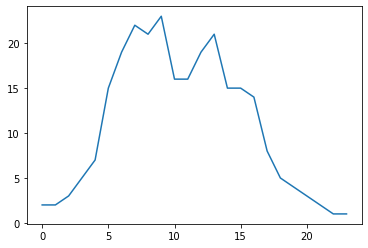

In [219]:
plt.plot(city1)

24


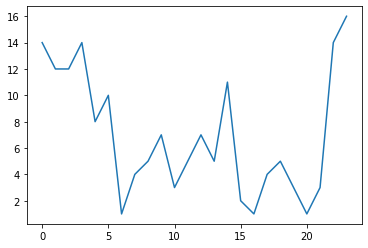

In [222]:
city2 = np.array([14,12,12,14,8,10,1,4,5,7,3,5,7,5,11,2,1,4,5,3,1,3,14,16])
print(len(city2))
plt.plot(city2)

In [316]:
demandlist = []
for i in range(len(city2)):
    c1 = city1[i]
    c2 = city2[i]
    cons = (
        {'type':'ineq','fun': lambda x:  -1*(1/3*x[0] - 1/3*x[1] - 300)  },
        {'type':'ineq','fun': lambda x:  -1*(1/3*x[0] + 2/3*x[1] - 1000) },
        {'type':'ineq','fun': lambda x:  -1*(2/3*x[0] + 1/3*x[1] - 1000) },
        {'type':'ineq','fun': lambda x:  1/3*x[0] - 1/3*x[1] + 300  },
        {'type':'ineq','fun': lambda x:  1/3*x[0] + 2/3*x[1] + 1000 },
        {'type':'ineq','fun': lambda x:  2/3*x[0] + 1/3*x[1] + 1000 },
        {'type':'ineq','fun': lambda x:  -1*(1/3*x[2] - 1/3*x[3] - 300)  },
        {'type':'ineq','fun': lambda x:  -1*(1/3*x[2] + 2/3*x[3] - 1000) },
        {'type':'ineq','fun': lambda x:  -1*(2/3*x[2] + 1/3*x[3] - 1000) },
        {'type':'ineq','fun': lambda x:  1/3*x[2] - 1/3*x[3] + 300  },
        {'type':'ineq','fun': lambda x:  1/3*x[2] + 2/3*x[3] + 1000 },
        {'type':'ineq','fun': lambda x:  2/3*x[2] + 1/3*x[3] + 1000 },
        {'type':'ineq','fun': lambda x:  -1*(x[5] + x[6] - 20) },
        {'type':'eq','fun': lambda x:  -0.01*(x[0] + x[1])+(x[4]+x[5]) },
        {'type':'eq','fun': lambda x:  -0.01*(x[2] + x[3])+(x[6]+x[7]) },
        {'type':'eq','fun': lambda x:  x[4]+x[6]-c1 },
        {'type':'eq','fun': lambda x:  x[5]+x[7]-c2 }
    )
    res = minimize(objective, np.zeros(8) + 0.05, bounds=bounds, constraints=cons)
    tmplist = res.x.tolist()
    tmplist.append(res.fun)
    demandlist.append(tmplist)
demandlist = np.array(demandlist)

In [319]:
demandlist[:,-1]

array([36000.14      , 30500.12      , 33000.12      , 46000.13166331,
       33000.07999877, 70000.04166673, 50000.00666996, 74000.02667264,
       74000.01667432, 92000.03000396, 46000.02166366, 54000.02501091,
       74000.00333383, 74000.01667432, 74000.04333694, 39000.02001358,
       33000.01000034, 25500.04000026, 20500.05000004, 14000.03000062,
        8000.01000011, 10000.03000026, 33000.14      , 39000.16000087])

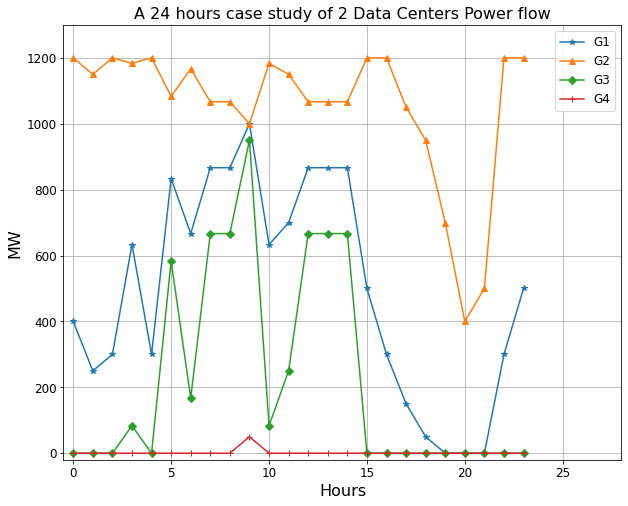

In [309]:
markerlist = ['*','^','D','+','x','d','v','s','8','o','<','>','1','2','3','4','P','p','h','H']
pltcnt = 0
plt.figure(figsize=(10,8))
plt.plot(demandlist[:,0],marker=markerlist[pltcnt],label="G1")
pltcnt+=1
plt.plot(demandlist[:,1],marker=markerlist[pltcnt],label="G2")
pltcnt+=1
plt.plot(demandlist[:,2],marker=markerlist[pltcnt],label="G3")
pltcnt+=1
plt.plot(demandlist[:,3],marker=markerlist[pltcnt],label="G4")
plt.legend(fontsize=12)
plt.grid()
plt.xlabel("Hours",fontsize=16)
plt.ylabel("MW",fontsize=16)
plt.xlim(-0.5,28)
plt.ylim(-20,1300)
plt.tick_params(labelsize=12)
plt.title("A 24 hours case study of 2 Data Centers Power flow",fontsize=16)
plt.savefig("powerflow")
plt.show()

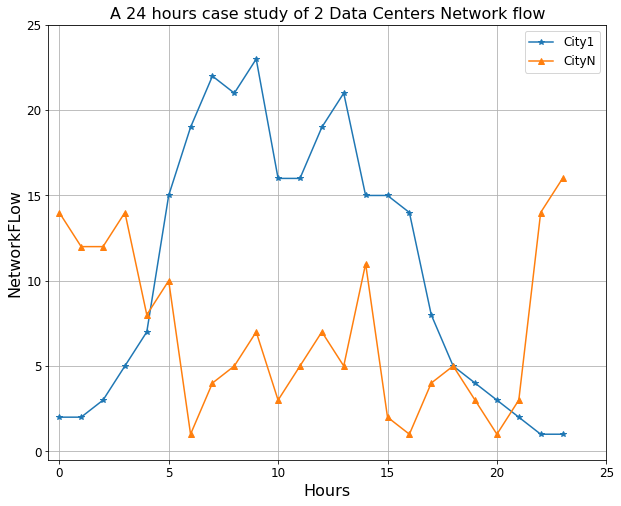

In [323]:
markerlist = ['*','^','D','+','x','d','v','s','8','o','<','>','1','2','3','4','P','p','h','H']
pltcnt = 0
plt.figure(figsize=(10,8))
plt.plot(city1,marker=markerlist[pltcnt],label="City1")
pltcnt+=1
plt.plot(city2,marker=markerlist[pltcnt],label="CityN")
pltcnt+=1
plt.legend(fontsize=12)
plt.grid()
plt.xlabel("Hours",fontsize=16)
plt.ylabel("NetworkFLow",fontsize=16)
plt.xlim(-0.5,25)
plt.ylim(-0.5,25)
plt.tick_params(labelsize=12)
plt.title("A 24 hours case study of 2 Data Centers Network flow",fontsize=16)
plt.savefig("networkflow")
plt.show()

In [301]:
for i in range(len(city1)):
    liststr = []
    for j in range(len(demandlist[i])):
        liststr.append(str(demandlist[i][j]))
    print( str(city1[i])+","+str(city2[i])+","+",".join(liststr) )

2,14,399.9999999999966,1199.9999999999936,0.0,1.063202385109888e-11,1.9999999999999194,13.99999999999998,8.051821001807155e-14,1.9455943663687945e-14
2,12,250.00000000010024,1149.9999999998856,0.0,1.5120519408467103e-11,1.999999999999847,12.00000000000001,1.528950340087213e-13,0.0
3,12,300.00000000000165,1200.0,4.07779893655631e-13,0.0,2.99999999999998,12.000000000000062,1.9934997043641905e-14,0.0
5,14,633.2881406963345,1183.3559299461087,83.35592947717916,0.0,5.000000000549211,13.166440705875106,0.0,0.8335592941248944
7,8,299.9999999588868,1200.0,0.0,0.0,7.000000000298334,8.000000000515932,8.91281626437846e-11,0.0
15,10,833.3097334839359,1083.3451333404062,583.3451332478835,0.0,14.999999703542056,4.16654896470511,2.9645794540420164e-07,5.83345103529489
19,1,666.6274690622088,1166.6862655139057,166.68626547963652,0.0,18.33313734789255,2.154854521459105e-10,0.6668626521074505,1.000000002145358
22,4,866.6239222041319,1066.688039044229,666.688038920732,5.31569765580867e-14,19.333119461062

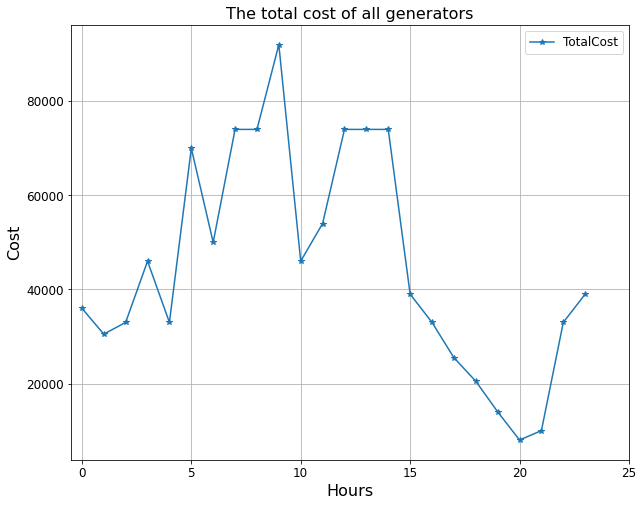

In [322]:
markerlist = ['*','^','D','+','x','d','v','s','8','o','<','>','1','2','3','4','P','p','h','H']
pltcnt = 0
plt.figure(figsize=(10,8))
plt.plot(demandlist[:,-1],marker=markerlist[pltcnt],label="TotalCost")
pltcnt+=1
plt.legend(fontsize=12)
plt.grid()
plt.xlabel("Hours",fontsize=16)
plt.ylabel("Cost",fontsize=16)
plt.xlim(-0.5,25)
# plt.ylim(-0.5,25)
plt.tick_params(labelsize=12)
plt.title("The total cost of all generators",fontsize=16)
plt.savefig("costoffun")
plt.show()

In [315]:
demandlist[-1,:]

array([5.00000000e+02, 1.20000000e+03, 1.11871405e-08, 1.11337929e-08,
       1.00000000e+00, 1.60000000e+01, 1.08505748e-11, 2.12358759e-10,
       3.90001600e+04])